# 📈 Reporte del Pipeline de Regresión

Este notebook presenta un análisis completo del pipeline de regresión, mostrando los resultados de los 5 modelos evaluados y sus métricas de evaluación para predecir la cantidad de ventas (valor continuo).


In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kedro.framework.startup import bootstrap_project
from kedro.framework.session import KedroSession

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")


[11/27/25 02:45:13] INFO     Using 'C:\Users\raulr\OneDrive\Escritorio\Proyecto                     __init__.py:270
                             definitivo\proyecto-kedro\venv\Lib\site-packages\kedro\framework\proje                
                             ct\rich_logging.yml' as logging configuration.                                        

✅ Librerías importadas correctamente


In [2]:
project_path = Path.cwd().parent
bootstrap_project(project_path)
session = KedroSession.create(project_path=project_path)
catalog = session.load_context().catalog

analisis_reg = catalog.load('analisis_pipeline_regresion')

print("✅ Reporte cargado exitosamente")
print(f"📋 Claves principales: {list(analisis_reg.keys())}")


[11/27/25 02:45:18] INFO     Loading data from analisis_pipeline_regresion (PickleDataset)...  data_catalog.py:1046

✅ Reporte cargado exitosamente
📋 Claves principales: ['resumen_general', 'preparacion_datos', 'modelos', 'comparacion_modelos', 'outputs_generados', 'recomendaciones']


## 3. Resumen General


In [3]:
resumen = analisis_reg['resumen_general']

print("=" * 80)
print("📊 RESUMEN GENERAL DEL PIPELINE DE REGRESIÓN")
print("=" * 80)
print(f"\n📊 Muestras totales: {resumen['total_muestras']:,}")
print(f"📈 Muestras entrenamiento: {resumen['muestras_entrenamiento']:,}")
print(f"📉 Muestras prueba: {resumen['muestras_prueba']:,}")
print(f"📊 Proporción train/test: {resumen['proporcion_train_test']}")
print(f"\n📋 Features utilizadas: {resumen['total_features']}")
print(f"📝 Features: {', '.join(resumen['features_utilizadas'])}")
print(f"\n🔬 Modelos evaluados: {len(resumen['modelos_evaluados'])}")
print(f"🎯 Variable objetivo: {resumen['variable_objetivo']}")


📊 RESUMEN GENERAL DEL PIPELINE DE REGRESIÓN

📊 Muestras totales: 7,954
📈 Muestras entrenamiento: 6,363
📉 Muestras prueba: 1,591
📊 Proporción train/test: 6363/1591 (80.0%/20.0%)

📋 Features utilizadas: 7
📝 Features: MES, PRODUCTO_ID, COMUNA_ID, VENTA_MES_ANTERIOR, PROM_3_MESES, PROM_6_MESES, DELTA_MES

🔬 Modelos evaluados: 5
🎯 Variable objetivo: CANTIDAD (valor continuo)


## 4. Comparación de Modelos


🏆 COMPARACIÓN DE MODELOS

🥇 Mejor R²: GradientBoosting (0.9915)
🥇 Mejor RMSE: GradientBoosting (0.5884)
🥇 Mejor MAE: RandomForest (0.1370)


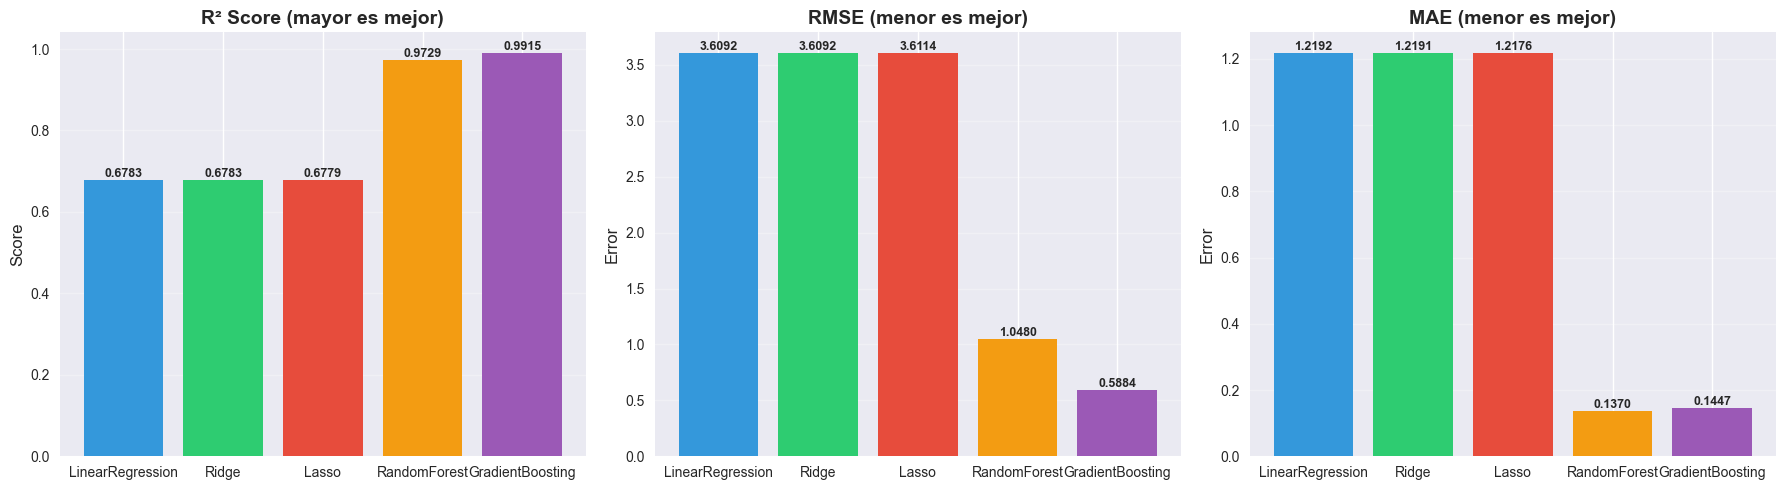

In [4]:
comparacion = analisis_reg['comparacion_modelos']

print("=" * 80)
print("🏆 COMPARACIÓN DE MODELOS")
print("=" * 80)
print(f"\n🥇 Mejor R²: {comparacion['mejor_r2']['modelo']} ({comparacion['mejor_r2']['score']:.4f})")
print(f"🥇 Mejor RMSE: {comparacion['mejor_rmse']['modelo']} ({comparacion['mejor_rmse']['score']:.4f})")
print(f"🥇 Mejor MAE: {comparacion['mejor_mae']['modelo']} ({comparacion['mejor_mae']['score']:.4f})")

# Visualización comparativa
modelos = list(analisis_reg['modelos'].keys())
r2_scores = [analisis_reg['modelos'][m]['metricas']['r2'] for m in modelos]
rmse_scores = [analisis_reg['modelos'][m]['metricas']['rmse'] for m in modelos]
mae_scores = [analisis_reg['modelos'][m]['metricas']['mae'] for m in modelos]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score
axes[0].bar(modelos, r2_scores, color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6'])
axes[0].set_title('R² Score (mayor es mejor)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(r2_scores):
    axes[0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# RMSE
axes[1].bar(modelos, rmse_scores, color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6'])
axes[1].set_title('RMSE (menor es mejor)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Error', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(rmse_scores):
    axes[1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# MAE
axes[2].bar(modelos, mae_scores, color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6'])
axes[2].set_title('MAE (menor es mejor)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Error', fontsize=12)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(mae_scores):
    axes[2].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


In [5]:
modelos_data = analisis_reg['modelos']

print("=" * 80)
print("📊 ANÁLISIS DETALLADO POR MODELO")
print("=" * 80)

for nombre_modelo, datos_modelo in modelos_data.items():
    print(f"\n{'='*80}")
    print(f"🤖 {nombre_modelo}")
    print(f"{'='*80}")
    
    metricas = datos_modelo['metricas']
    print(f"\n📊 Métricas:")
    print(f"  - R²: {metricas['r2']:.4f} ({datos_modelo['interpretacion']['r2']})")
    print(f"  - RMSE: {metricas['rmse']:.4f} ({datos_modelo['interpretacion']['rmse']})")
    print(f"  - MAE: {metricas['mae']:.4f} ({datos_modelo['interpretacion']['mae']})")
    
    if datos_modelo['mejores_parametros']:
        print(f"\n⚙️  Mejores parámetros: {datos_modelo['mejores_parametros']}")
    
    if datos_modelo['score_cv']:
        print(f"📈 Score CV: {datos_modelo['score_cv']:.4f}")


📊 ANÁLISIS DETALLADO POR MODELO

🤖 LinearRegression

📊 Métricas:
  - R²: 0.6783 (R² de 0.6783 (67.83% de varianza explicada))
  - RMSE: 3.6092 (Error cuadrático medio de 3.6092 unidades)
  - MAE: 1.2192 (Error absoluto medio de 1.2192 unidades)

🤖 Ridge

📊 Métricas:
  - R²: 0.6783 (R² de 0.6783 (67.83% de varianza explicada))
  - RMSE: 3.6092 (Error cuadrático medio de 3.6092 unidades)
  - MAE: 1.2191 (Error absoluto medio de 1.2191 unidades)

⚙️  Mejores parámetros: {'alpha': 10.0}
📈 Score CV: 0.6960

🤖 Lasso

📊 Métricas:
  - R²: 0.6779 (R² de 0.6779 (67.79% de varianza explicada))
  - RMSE: 3.6114 (Error cuadrático medio de 3.6114 unidades)
  - MAE: 1.2176 (Error absoluto medio de 1.2176 unidades)

⚙️  Mejores parámetros: {'alpha': 0.1}
📈 Score CV: 0.6960

🤖 RandomForest

📊 Métricas:
  - R²: 0.9729 (R² de 0.9729 (97.29% de varianza explicada))
  - RMSE: 1.0480 (Error cuadrático medio de 1.0480 unidades)
  - MAE: 0.1370 (Error absoluto medio de 0.1370 unidades)

⚙️  Mejores parámetros

## 6. Estadísticas de la Variable Objetivo


📊 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (CANTIDAD)

📈 Entrenamiento:
  - Media: 2.81
  - Desviación estándar: 5.55
  - Mínimo: 1.00
  - Máximo: 60.00
  - Mediana: 1.00

📉 Prueba:
  - Media: 2.99
  - Desviación estándar: 6.37
  - Mínimo: 1.00
  - Máximo: 60.00
  - Mediana: 1.00


[11/27/25 02:45:43] INFO     Loading data from y_train_reg (ParquetDataset)...                 data_catalog.py:1046

[11/27/25 02:45:46] INFO     Loading data from y_test_reg (ParquetDataset)...                  data_catalog.py:1046

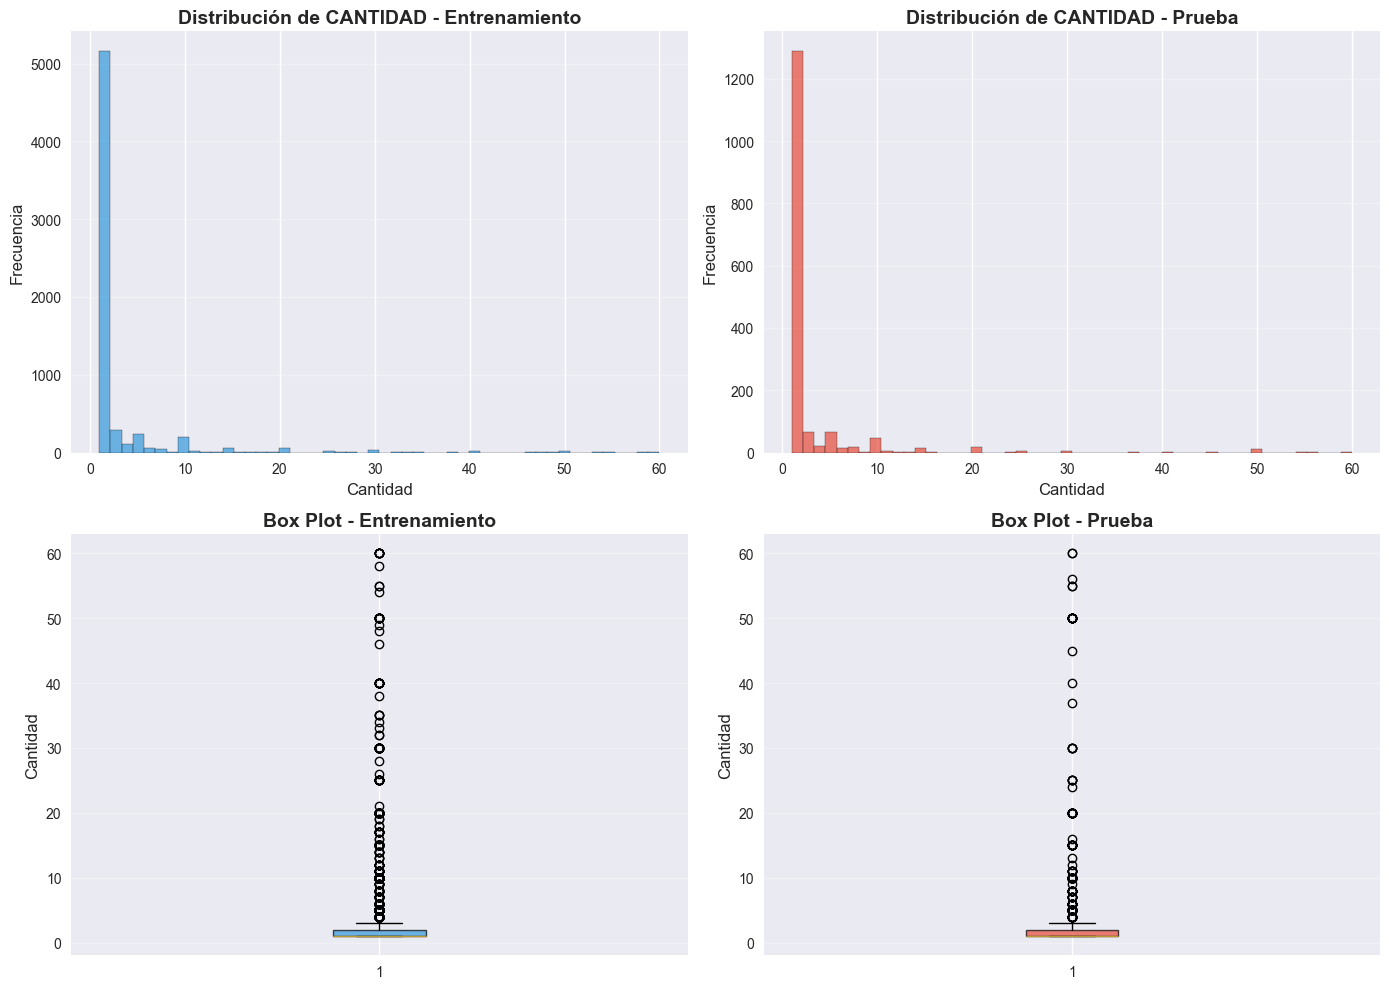

In [6]:
prep_datos = analisis_reg['preparacion_datos']

print("=" * 80)
print("📊 ESTADÍSTICAS DE LA VARIABLE OBJETIVO (CANTIDAD)")
print("=" * 80)

print(f"\n📈 Entrenamiento:")
stats_train = prep_datos['estadisticas_target_entrenamiento']
print(f"  - Media: {stats_train['mean']:.2f}")
print(f"  - Desviación estándar: {stats_train['std']:.2f}")
print(f"  - Mínimo: {stats_train['min']:.2f}")
print(f"  - Máximo: {stats_train['max']:.2f}")
print(f"  - Mediana: {stats_train['median']:.2f}")

print(f"\n📉 Prueba:")
stats_test = prep_datos['estadisticas_target_prueba']
print(f"  - Media: {stats_test['mean']:.2f}")
print(f"  - Desviación estándar: {stats_test['std']:.2f}")
print(f"  - Mínimo: {stats_test['min']:.2f}")
print(f"  - Máximo: {stats_test['max']:.2f}")
print(f"  - Mediana: {stats_test['median']:.2f}")

# Cargar datos reales para visualización
y_train = catalog.load('y_train_reg')
y_test = catalog.load('y_test_reg')

if isinstance(y_train, pd.DataFrame):
    y_train_series = y_train.iloc[:, 0]
    y_test_series = y_test.iloc[:, 0]
else:
    y_train_series = y_train
    y_test_series = y_test

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma entrenamiento
axes[0,0].hist(y_train_series, bins=50, color='#3498DB', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribución de CANTIDAD - Entrenamiento', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Cantidad', fontsize=12)
axes[0,0].set_ylabel('Frecuencia', fontsize=12)
axes[0,0].grid(axis='y', alpha=0.3)

# Histograma prueba
axes[0,1].hist(y_test_series, bins=50, color='#E74C3C', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Distribución de CANTIDAD - Prueba', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Cantidad', fontsize=12)
axes[0,1].set_ylabel('Frecuencia', fontsize=12)
axes[0,1].grid(axis='y', alpha=0.3)

# Box plot entrenamiento
axes[1,0].boxplot(y_train_series, vert=True, patch_artist=True,
                 boxprops=dict(facecolor='#3498DB', alpha=0.7))
axes[1,0].set_title('Box Plot - Entrenamiento', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Cantidad', fontsize=12)
axes[1,0].grid(axis='y', alpha=0.3)

# Box plot prueba
axes[1,1].boxplot(y_test_series, vert=True, patch_artist=True,
                 boxprops=dict(facecolor='#E74C3C', alpha=0.7))
axes[1,1].set_title('Box Plot - Prueba', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Cantidad', fontsize=12)
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Recomendaciones


In [7]:
recomendaciones = analisis_reg.get('recomendaciones', {})

print("=" * 80)
print("💡 RECOMENDACIONES")
print("=" * 80)

if 'mejor_modelo_general' in recomendaciones:
    print(f"\n🏆 Mejor modelo general: {recomendaciones['mejor_modelo_general']}")
if 'mejor_para_produccion' in recomendaciones:
    print(f"🚀 Mejor para producción: {recomendaciones['mejor_para_produccion']}")

# Generar observaciones automáticamente si no existen
observaciones = recomendaciones.get('observaciones', [])

# Agregar observaciones automáticas basadas en métricas
comparacion = analisis_reg.get('comparacion_modelos', {})
if comparacion:
    mejor_r2 = comparacion.get('mejor_r2', {})
    mejor_rmse = comparacion.get('mejor_rmse', {})
    
    if mejor_r2:
        r2_score = mejor_r2.get('score', 0)
        observaciones.append(f"El mejor modelo según R² es {mejor_r2.get('modelo', 'N/A')} con {r2_score:.4f} ({r2_score*100:.2f}% de varianza explicada).")
        if r2_score > 0.99:
            observaciones.append(f"El modelo explica más del 99% de la varianza, excelente ajuste a los datos.")
        elif r2_score > 0.95:
            observaciones.append(f"El modelo explica más del 95% de la varianza, muy buen rendimiento.")
    
    if mejor_rmse:
        observaciones.append(f"El mejor modelo según RMSE es {mejor_rmse.get('modelo', 'N/A')} con {mejor_rmse.get('score', 0):.4f} unidades de error.")
    
    # Análisis de rendimiento general
    if 'modelos' in analisis_reg:
        r2_scores = [m.get('metricas', {}).get('r2', 0) for m in analisis_reg['modelos'].values()]
        if r2_scores:
            if max(r2_scores) > 0.99:
                observaciones.append(f"Los modelos de ensemble (GradientBoosting, RandomForest) muestran un rendimiento significativamente superior a los modelos lineales.")
            if min(r2_scores) < 0.5:
                observaciones.append(f"Los modelos lineales (LinearRegression, Ridge, Lasso) tienen un R² mucho menor, indicando que no capturan bien la variabilidad de los datos.")

print(f"\n📝 Observaciones:")
if observaciones:
    for i, obs in enumerate(observaciones, 1):
        print(f"  {i}. {obs}")
else:
    print("  No hay observaciones adicionales registradas.")

print("\n" + "=" * 80)
print("✅ Análisis del Pipeline de Regresión Completado")
print("=" * 80)


💡 RECOMENDACIONES

🏆 Mejor modelo general: GradientBoosting
🚀 Mejor para producción: GradientBoosting

📝 Observaciones:
  1. El mejor modelo según R² es GradientBoosting con 0.9915 (99.15% de varianza explicada)
  2. El mejor modelo según RMSE es GradientBoosting con 0.5884 unidades
  3. GradientBoosting y RandomForest muestran los mejores resultados (R² > 0.98)
  4. Los modelos lineales (LinearRegression, Ridge, Lasso) tienen R² ~0.69, indicando que las relaciones no son completamente lineales
  5. El RMSE del mejor modelo (0.5884) es bajo comparado con el rango de valores objetivo
  6. El mejor modelo según R² es GradientBoosting con 0.9915 (99.15% de varianza explicada).
  7. El modelo explica más del 99% de la varianza, excelente ajuste a los datos.
  8. El mejor modelo según RMSE es GradientBoosting con 0.5884 unidades de error.
  9. Los modelos de ensemble (GradientBoosting, RandomForest) muestran un rendimiento significativamente superior a los modelos lineales.

✅ Análisis del 

In [ ]:
session.close()
print("✅ Sesión de Kedro cerrada")
